# Adaline
___

1) Use classdata to train and classdataVal to evaluate.

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
classdata = pd.read_csv('classdata.csv', header=None, names=['x1', 'x2', 'class']).sample(frac=1).reset_index(drop=True)
classdata.head()

,x1,x2,class
0,-0.94,-0.78,0
1,0.73,0.35,1
2,0.04,0.27,1
3,-0.80,-0.69,0
4,0.89,0.82,1


Init weights, learning rate, maximum epochs, etc.

In [25]:
N = len(classdata)
M = len(classdata.columns)
W = pd.Series(np.random.normal(scale=1/N, size=(M,)), index = classdata.columns[:-1].append(pd.Index(['b'])))
W_list = [W.copy()]
ETA = 0.01
epoch = 0
max_epoch = 350
SE = 1
alpha = 1
SE_list = []

Sigmoid Function

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-alpha*x))

Activation function:

In [27]:
def activacion(x):
    v = W.dot(x)
    return sigmoid(v)

LMS:

In [28]:
while SE > 2e-5 and epoch < max_epoch:
    SE = 0
    # Iteramos sobre las muestras
    for n in range(N):
        x = classdata.iloc[n, [0, 1]] # tomamos la n-ésima muestra
        x = x.append(pd.Series([1], index=['b'])) # agregamos el sesgo
        d = classdata.iloc[n, 2] # la clase esperada
        
        y = activacion(x) # calculamos la salida
        
        error = d - y
        SE += error**2
        
        W += ETA*error*x # actualizamos los pesos
        
    SE /= 2
    SE_list.append(SE)
    W_list.append(W.copy())
    epoch += 1

Learning curve:

345    0.144669
346    0.144398
347    0.144128
348    0.143859
349    0.143591
dtype: float64


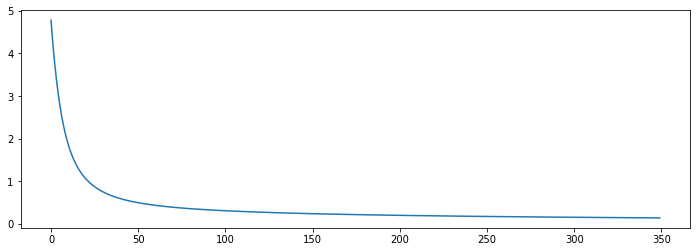

In [29]:
pd.Series(SE_list).plot.line(figsize=(12,4))
print(pd.Series(SE_list).tail())

Red line is initial classification line, cyan line is final classification line:

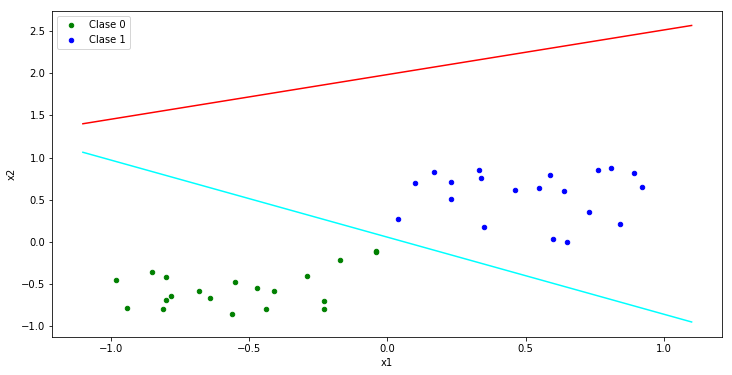

In [30]:
ax = classdata[classdata['class'] == 0].plot.scatter(x='x1', y='x2', color='green', label='Clase 0', figsize=(12,6))
classdata[classdata['class'] == 1].plot.scatter(x='x1', y='x2', color='blue', label='Clase 1', ax=ax)

w = W_list[0]
x = np.linspace(-1.1, 1.1)
color = 'red'
plt.plot(x, -(w[2]+x*w[0])/w[1], color=color)

w = W_list[-1]
color = 'cyan'
plt.plot(x, -(w[2]+x*w[0])/w[1], color=color)

Let's validate data:

In [43]:
validdata = pd.read_csv('classdataVal.csv',header=None, names=['x1', 'x2'])
#validdata.insert(len(validdata.columns), 'predicted class', 0)
validdata

,x1,x2
0,-0.58,-0.85
1,-0.71,-0.34
2,-0.89,-0.74
3,-0.62,-0.77
4,-0.19,-0.39
5,-0.31,-0.40
6,0.19,0.49
7,0.57,0.80
8,0.67,0.94
9,0.80,0.57


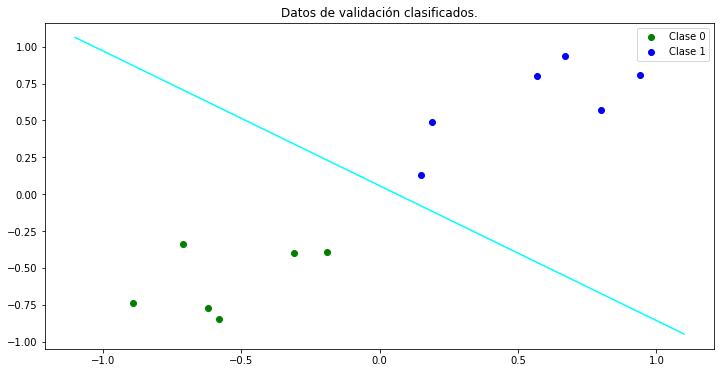

In [50]:
plt.figure(figsize=(12,6))
legend = {
    'blue': False,
    'green': False
}
for i in range(len(validdata)):
    x = validdata.iloc[i].append(pd.Series([1], index=['b']))
    y = activacion(x)
    label = None
    if y >= 0.5:
        color = 'blue'
        if not legend[color]: # if not labeled yet
            label = 'Clase 1'
            legend[color] = True
    else:
        color = 'green'
        if not legend[color]: # If not labeled yet
            label = 'Clase 0'
            legend[color] = True
        
    plt.scatter(x.loc['x1'], x.loc['x2'], color=color, label=label)

plt.legend()
plt.title('Datos de validación clasificados.')
    
x = np.linspace(-1.1, 1.1)
color = 'cyan'
plt.plot(x, -(w[2]+x*w[0])/w[1], color=color)